In this example, you are going to generate product descriptions and visuals based on product ideas provided by user.

In the following cell, we are importing necessary packages and setting up a bedrock client.

In [18]:
import json
import os
import sys

import boto3
import botocore

import base64
from PIL import Image
from io import BytesIO

boto3_bedrock = boto3.client('bedrock-runtime')


We are taking user input as a variable and use it in the prompt template to easily generate product descriptions for different products as needed.

In [33]:
user_input = "Baby Stroller and Scooter Hybrid"

In [34]:
text_prompt = f"""
You are an assistant designed to help product teams craft compelling and informative product descriptions. Your task is to generate detailed, realistic, and easy-to-understand product descriptions based on the user's input about their product idea.

Your product descriptions should be clear, concise, and effectively convey the key features, benefits, and unique selling points of the product. Your goal is to create descriptions that are engaging, persuasive, and help potential customers understand the value and functionality of the product.

Please use the user input user to understand their product concept and tailor the descriptions accordingly. Your output should be of a professional quality, reflecting the specific needs and requirements of the product team.

Here is the product idea - ```{user_input}```
"""

Creating request body according to the model requirement.

In [35]:
body = json.dumps({
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": 1000,
    "messages": [
      {
        "role": "user",
        "content": [
          {
              "type": "text", 
              "text": text_prompt
          }
        ]
      }
    ],
    "temperature":0.5,
    "top_k":250,
    "top_p":0.5,
    "stop_sequences":[]
})

Invoking Claude 3 Sonnet model and supplying the prepared prompt to generate product description.

In [36]:
modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'

try:
    response = boto3_bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
    response_body = json.loads(response.get('body').read())

    print(response_body.get('content')[0]['text'])
    
except botocore.exceptions.ClientError as error:
    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")
        
    else:
        raise error

Here is a detailed product description for a Baby Stroller and Scooter Hybrid:

Introducing the revolutionary Baby Rover™ - the world's first hybrid stroller and scooter designed for modern, active families on the go. This innovative product seamlessly combines the functionality of a full-featured stroller with the convenience and mobility of a kick scooter, providing parents with the ultimate transportation solution for their little ones.

The Baby Rover™ features a sturdy, lightweight aluminum frame and a spacious, well-padded stroller seat that can accommodate children from birth up to 50 lbs. With a simple one-handed operation, the stroller can instantly transform into a sleek, three-wheeled kick scooter, allowing you to effortlessly navigate crowded city streets, parks, or any urban environment.

For stroller mode, the Baby Rover™ boasts a host of premium features, including an adjustable canopy for sun protection, a roomy storage basket for essentials, and a smooth, all-terrain s

Creating prompt for image generation to supply it to model

In [29]:
image_prompt = """
Cutting-edge Baby Stroller and Scooter Hybrid: sleek, modern design, comfortable seat, adjustable handles, compact, foldable, seamless scooter integration, sturdy wheels, powerful motor, intuitive controls, emphasizing convenience, safety, and appeal to on-the-go parents.
"""

In [30]:
image_body = json.dumps(
    {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {"text": image_prompt},
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "quality": "standard",
            "cfgScale": 8.0,
            "height": 512,
            "width": 512,
            "seed": 100,
        },
    }
)

Invoking Titan Image Generator model

In [31]:
try:
    response = boto3_bedrock.invoke_model(
        modelId="amazon.titan-image-generator-v1", 
        body=image_body,
        accept="application/json", 
        contentType="application/json"
    )

    response_body = json.loads(response.get("body").read())
    images = [Image.open(BytesIO(base64.b64decode(base64_image))) for base64_image in response_body.get("images")]

except ClientError:
    logger.error("Couldn't invoke Titan Image generator")
    raise

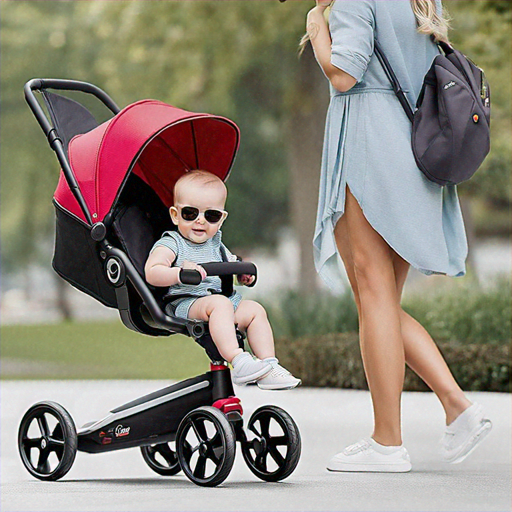

In [32]:
#displaying generated images
for img in images:
    display(img)